<a href="https://colab.research.google.com/github/anthopper/meteorology/blob/main/RSS_Map_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


This section cleans up the collision between shapely and cartopy packages.

In [2]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.6.4
Uninstalling Shapely-1.6.4:
  Successfully uninstalled Shapely-1.6.4
     |████████████████████████████████| 198 kB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.1.post1-cp37-cp37m-linux_x86_64.whl size=665640 sha256=d9908dcd4da25b8d9ed5194fac9270854173acbc8d4a072885894aaec34cca25
  Stored in directory: /root/.cache/pip/wheels/ea/8d/2f/ab748b8a432b3c6cd72e751b3bca17c5a9ed4538b1e78467e6
Successfully built shapely
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


***

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import scipy.io.netcdf as sp

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, we load in the data and create some new variables from it.

In [6]:
fileObj = sp.NetCDFFile('/content/drive/My Drive/Meteorology/CERES_EBAF-TOA_Ed4.1_Subset_200003-202111.nc', 'r')

RSR = fileObj.variables['toa_sw_all_mon'][:]
lat = fileObj.variables['lat'][:]
lon = fileObj.variables['lon'][:]

numYears = RSR.shape[0] // 12

fullYearRSR = RSR[0:numYears * 12, :, :]

# Average the data at each location across all months
means = fullYearRSR.mean(axis=0)


Finally we visualize the data on the map.

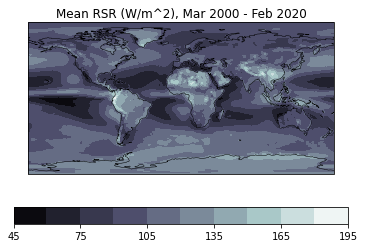

In [7]:
# Fix problem with 0 longitude missing data
means, lon = add_cyclic_point(means, coord=lon)
axes = plt.axes(projection=ccrs.PlateCarree())
axes.add_feature(cfeature.COASTLINE, linewidth=0.5)

# Overlay the contours onto the map based on the mean RSR values at each location. Include a color bar and add a title
plt.contourf(lon[:], lat[:], means[:,:], levels=12, cmap='bone')
plt.colorbar(orientation='horizontal')
plt.title('Mean RSR (W/m^2), Mar 2000 - Feb 2020')


# Save a PNG image of the map
plt.savefig('/content/drive/My Drive/Meteorology/RSR_Map.png', bbox_inches='tight', dpi=200)


# projection options: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
# cmap options: https://matplotlib.org/stable/tutorials/colors/colormaps.html